In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Problem 1:
 Pick an image to display, and use the package Matplotlib to do so. Commands such as plt.imshow and plt.show are helpful here. Notice how the colors seem inverted, so you can use the function cv2.cvtColor to change that.

In [27]:
def display_image(img, title="Image"):
    """Display an image using matplotlib"""
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

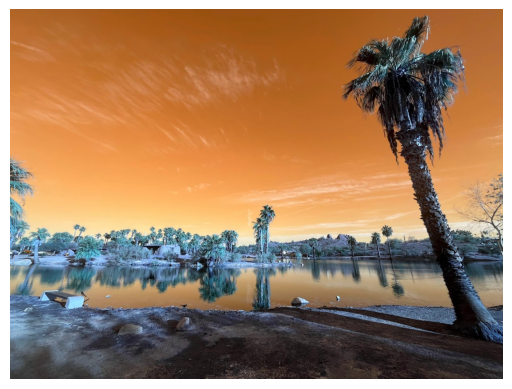

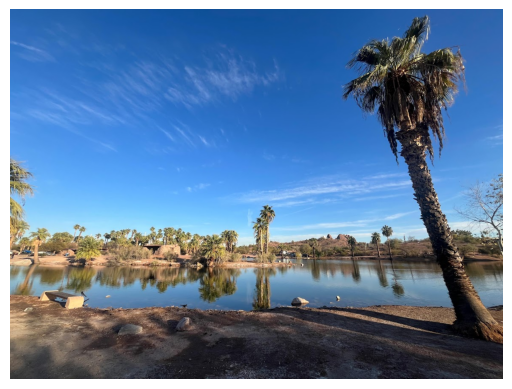

In [28]:
#Load an image
img = cv2.imread('A1_I1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

2. Zoom in on a particular part of the image by cropping the image. Display the image.

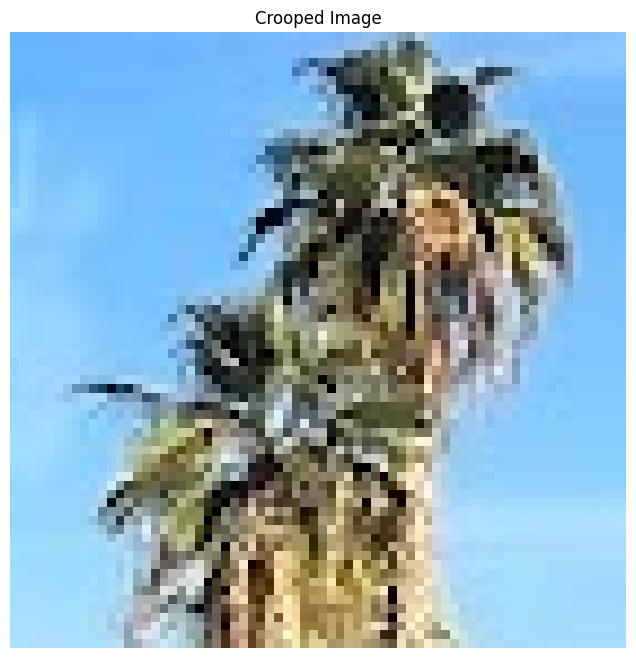

In [29]:
# Define the cropping coordinates (x, y, width, height)
x, y, w, h = 560, 460, 70, 70
cropped_image = image_rgb[y:y+h, x:x+w]

display_image(cropped_image,"Crooped Image")

3. Read in another image to be used for image sampling. Downsample the image by 10× in width and height. Use the cv2.resize command. If you have problems with this command, look at examples online and use the keyword “None” for the optional parameters. Display the downsampled image

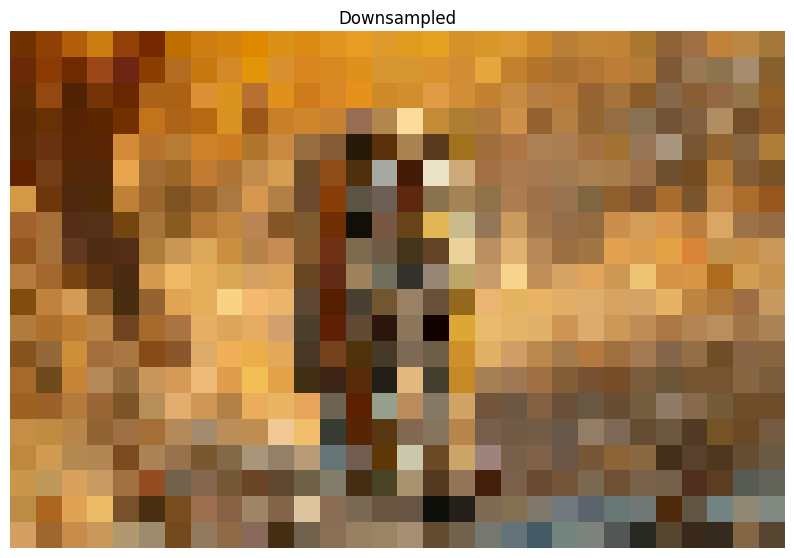

In [30]:
img = cv2.imread('A1_I2.jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# height, width = image_rgb.shape[:2]
downsampled = cv2.resize(image_rgb, (None, None), fx=0.1, fy=0.1)
display_image(downsampled, "Downsampled")

4. Using the resize command, upsample the same downsampled image from part b by 10x back to its original resolution. This time, try two different interpolation methods: nearest neighbor and bicubic. Display them.

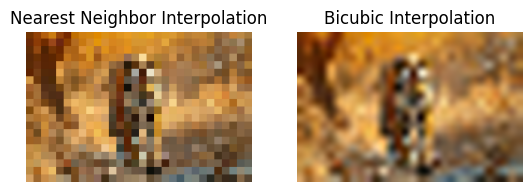

In [31]:
# Upsample the image using nearest neighbor interpolation
nearest_neighbor_image = cv2.resize(downsampled, (None, None), fx=10, fy=10, interpolation=cv2.INTER_NEAREST)
# Upsample the image using bicubic interpolation
bicubic_image = cv2.resize(downsampled, (None, None), fx=10, fy=10, interpolation=cv2.INTER_CUBIC)

plt.subplot(1, 2, 1)
plt.imshow(nearest_neighbor_image)
plt.axis('off')
plt.title('Nearest Neighbor Interpolation')

plt.subplot(1, 2, 2)
plt.imshow(bicubic_image)
plt.axis('off')
plt.title('Bicubic Interpolation')

plt.show()

5. Calculate the absolute difference between the ground truth image and the two upsampled images with the two methods (find the appropriate OpenCV command, should be one line of code for each image). Write out the difference images for both methods. Then sum all the pixels in the difference image for the two methods, and report the number. Which method caused less error in upsampling? Explain when you might use one method over the other (you should have use cases for using both methods, not just using one method all the time).

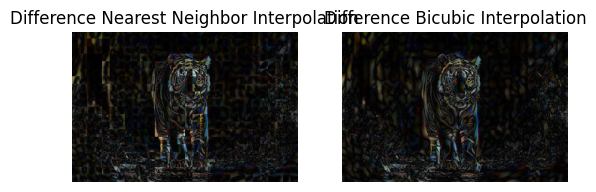

Sum of pixel differences (Nearest Neighbor): 3446690
Sum of pixel differences (Bicubic): 3137288


In [32]:
# Calculate the absolute difference between the ground truth image and the upsampled images
difference_nearest = cv2.absdiff(image_rgb, nearest_neighbor_image)
difference_bicubic = cv2.absdiff(image_rgb, bicubic_image)

plt.subplot(1, 2, 1)
plt.imshow(difference_nearest)
plt.axis('off')
plt.title('Difference Nearest Neighbor Interpolation')

plt.subplot(1, 2, 2)
plt.imshow(difference_bicubic)
plt.axis('off')
plt.title('Difference Bicubic Interpolation')

plt.show()

# Sum all the pixels in the difference images
sum_difference_nearest = np.sum(difference_nearest)
sum_difference_bicubic = np.sum(difference_bicubic)

# Report the sums
print(f"Sum of pixel differences (Nearest Neighbor): {sum_difference_nearest}")
print(f"Sum of pixel differences (Bicubic): {sum_difference_bicubic}")